In [1]:
# upload and extract zip file
import zipfile
from google.colab import files
uploaded = files.upload()
with zipfile.ZipFile('Resumes.zip', 'r') as zip_ref:
  zip_ref.extractall('destination_folder')

Saving Resumes.zip to Resumes.zip


In [3]:
!pip install python-docx
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00


In [9]:
import os
import chardet
from docx import Document
import PyPDF2
import pandas as pd

# Function to detect encoding
def detect_encoding(data):
    result = chardet.detect(data)
    return result['encoding']

# Function to extract text from .doc files
def extract_text_from_doc(file_path):
    try:
        with open(file_path, 'rb') as file:
            content = file.read()
            encoding = detect_encoding(content)
            return content.decode(encoding, errors='ignore')
    except Exception as e:
        return f"Error reading DOC file {file_path}: {e}"

# Function to extract text from .docx files
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return '\n'.join([para.text for para in doc.paragraphs])
    except Exception as e:
        return f"Error reading DOCX file {file_path}: {e}"

# Function to extract text from .pdf files
def extract_text_from_pdf(file_path):
    try:
        text = []
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                extracted_text = page.extract_text()
                if extracted_text:
                    text.append(extracted_text)
        return '\n'.join(text)
    except Exception as e:
        return f"Error reading PDF file {file_path}: {e}"

# Function to categorize and extract text
def extract_and_categorize_text(folder_paths):
    resume_texts = []
    labels = []

    for folder in folder_paths:
        # Check if the folder is the main "Resumes" folder
        if os.path.basename(folder) == 'Resumes':
            label = "React Developer resumes"  # Main folder is categorized as React Developer resumes
        else:
            label = os.path.basename(folder)  # Use the folder name for subfolders

        # Iterate through each file in the folder
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            if os.path.isfile(file_path):
                file_extension = os.path.splitext(file)[1].lower()
                if file_extension == '.doc':
                    text = extract_text_from_doc(file_path)
                elif file_extension == '.docx':
                    text = extract_text_from_docx(file_path)
                elif file_extension == '.pdf':
                    text = extract_text_from_pdf(file_path)
                else:
                    text = ""

                if text:
                    resume_texts.append(text)
                    labels.append(label)  # Assign the determined label

    return pd.DataFrame({'Resume_Text': resume_texts, 'Label': labels})

# Define the folder paths
folder_paths = [
    '/content/destination_folder/Resumes',  # Main folder, categorized as React Developer resumes
    '/content/destination_folder/Resumes/workday resumes',
    '/content/destination_folder/Resumes/Peoplesoft resumes',
    '/content/destination_folder/Resumes/SQL Developer Lightning insight'
]

# Extract and categorize text
df = extract_and_categorize_text(folder_paths)

# Display the DataFrame
print(df.head())

# Display label counts
print("\nLabel Counts:")
print(df['Label'].value_counts())


                                         Resume_Text                    Label
0  \nUi-Developer/ React JS Developer \nNAME: KRI...  React Developer resumes
1  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  React Developer resumes
2  ĞÏà¡±á                >  şÿ\t            ...  React Developer resumes
3  KAMALAKAR REDDY. A \nLinked In: https://www.li...  React Developer resumes
4  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React Developer resumes

Label Counts:
Label
React Developer resumes            24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64


In [3]:
# Main folder resumes categorised as Resumes
'''
import os
import chardet
from docx import Document
import PyPDF2
import pandas as pd

# Function to detect encoding
def detect_encoding(data):
    result = chardet.detect(data)
    return result['encoding']

# Function to extract text from .doc files
def extract_text_from_doc(file_path):
    try:
        with open(file_path, 'rb') as file:
            content = file.read()
            encoding = detect_encoding(content)
            return content.decode(encoding, errors='ignore')
    except Exception as e:
        return f"Error reading DOC file {file_path}: {e}"

# Function to extract text from .docx files
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return '\n'.join([para.text for para in doc.paragraphs])
    except Exception as e:
        return f"Error reading DOCX file {file_path}: {e}"

# Function to extract text from .pdf files
def extract_text_from_pdf(file_path):
    try:
        text = []
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                extracted_text = page.extract_text()
                if extracted_text:
                    text.append(extracted_text)
        return '\n'.join(text)
    except Exception as e:
        return f"Error reading PDF file {file_path}: {e}"

# Function to categorize and extract text
def extract_and_categorize_text(folder_paths):
    resume_texts = []
    labels = []

    for folder in folder_paths:
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            if os.path.isfile(file_path):
                file_extension = os.path.splitext(file)[1].lower()
                if file_extension == '.doc':
                    text = extract_text_from_doc(file_path)
                elif file_extension == '.docx':
                    text = extract_text_from_docx(file_path)
                elif file_extension == '.pdf':
                    text = extract_text_from_pdf(file_path)
                else:
                    text = ""

                if text:
                    resume_texts.append(text)
                    labels.append(os.path.basename(folder))  # Folder name as label

    return pd.DataFrame({'Resume_Text': resume_texts, 'Label': labels})

# Define the folder paths
folder_paths = [
    '/content/destination_folder/Resumes',
    '/content/destination_folder/Resumes/workday resumes',
    '/content/destination_folder/Resumes/Peoplesoft resumes',
    '/content/destination_folder/Resumes/SQL Developer Lightning insight'
]

# Extract and categorize text
df = extract_and_categorize_text(folder_paths)

# Display the DataFrame
print(df.head())

# Display label counts
print("\nLabel Counts:")
print(df['Label'].value_counts())'''

                                         Resume_Text    Label
0  \nUi-Developer/ React JS Developer \nNAME: KRI...  Resumes
1  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  Resumes
2  ĞÏà¡±á                >  şÿ\t            ...  Resumes
3  KAMALAKAR REDDY. A \nLinked In: https://www.li...  Resumes
4  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  Resumes

Label Counts:
Label
Resumes                            24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64


In [10]:
df['Label'].value_counts()

Label
React Developer resumes            24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64

In [11]:
df.shape

(79, 2)

In [12]:
#Word frequency before data preprocessing
freq = pd.Series(' '.join(df['Resume_Text']).split()).value_counts()[:40]
freq

and                                 1713
the                                  867
in                                   813
to                                   711
of                                   616
for                                  427
on                                   422
:                                    346
 QJ                                  339
using                                279
as                                   271
with                                 268
Workday                              214
a                                    208
from                                 204
Experience                           172
experience                           165
SQL                                  146
                                     145
PeopleSoft                           145
Application                          133
is                                   130
data                                 125
 ^J                                  125
business                             123
                                     122
&                                    119
                                     117
like                                 116
 o(  o    €                       110
Involved                             105
Worked                               105
  0  @  à  ğ                 104
various                              104
Server                               100
Project                               98
 o(  §ğ   €                        96
                                    96
sH                                   94
Good                                  94
Name: count, dtype: int64

In [13]:
# Data Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    # Lemmatize
    return " ".join([lemmatizer.lemmatize(word) for word in words])

df['Cleaned_Text'] = df['Resume_Text'].apply(preprocess_text)
print(df.sample(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                          Resume_Text  \
50  \nHaving 4.6 years of experience in PeopleSoft...   
54  Error reading DOC file /content/destination_fo...   
8   SHAIK ABDUL SHARUK   \n2 years’ Experience in ...   
24  Error reading DOC file /content/destination_fo...   
49  Error reading DOC file /content/destination_fo...   
15  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...   
13  \nUi-Developer/ React JS Developer \nNAME: KRI...   
39  \n\nMooraboyina Guravaiah\nWorkday Integration...   
5   Ranga Gaganam  \n \n \nHaving 1+ years of succ...   
48   PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...   

                      Label                                       Cleaned_Text  
50       Peoplesoft resumes  year experience peoplesoft application enhance...  
54       Peoplesoft resumes  error reading doc file contentdestinationfolde...  
8   React Developer resumes  shaik abdul sharuk year experience wipro caree...  
24          workday resumes  error reading doc f

In [14]:
#Word frequency after data preprocessing
freq = pd.Series(' '.join(df['Cleaned_Text']).split()).value_counts()[:40]
freq

experience     375
qj             339
application    289
report         288
using          287
workday        268
j              259
server         259
integration    249
project        233
data           198
business       187
peoplesoft     180
sql            168
process        160
th             159
knowledge      157
system         154
web            143
requirement    143
oj             143
tool           136
service        134
worked         131
client         128
good           126
database       124
skill          123
involved       121
like           118
sh             117
role           116
working        115
support        115
team           115
development    115
oo             110
technology     109
environment    107
technical      107
Name: count, dtype: int64

In [15]:
df.head()

Resume_Text                    Label  \
0  \nUi-Developer/ React JS Developer \nNAME: KRI...  React Developer resumes   
1  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  React Developer resumes   
2  ĞÏà¡±á                >  şÿ\t            ...  React Developer resumes   
3  KAMALAKAR REDDY. A \nLinked In: https://www.li...  React Developer resumes   
4  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React Developer resumes   

                                        Cleaned_Text  
0  uideveloper react j developer name krishna pro...  
1  md khizaruddin rauf experience currently worki...  
2  bda bjbjbb gg bbxttuc hpb x exbx maryala vinay...  
3  kamalakar reddy linked httpswwwlinkedincominka...  
4  mareedu lokesh babu professional overview arou...

In [16]:
# EDA with visualization
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

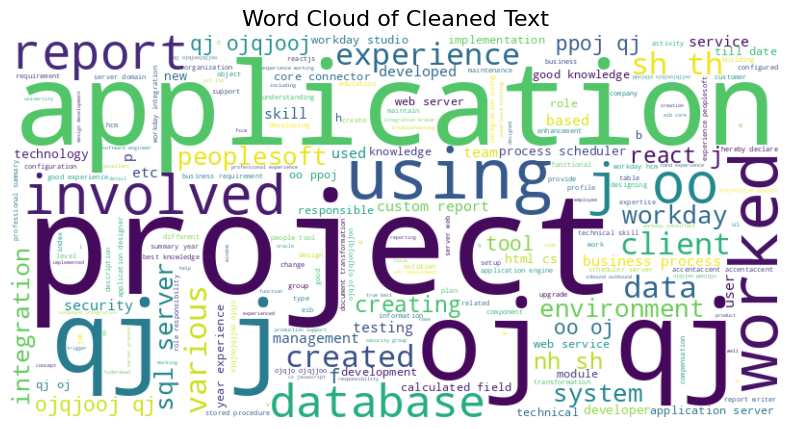

In [17]:
# In a word cloud, the size of the letters represents the relative frequency of a word compared to others in the dataset.
# Word Cloud of Preprocessed Text
# Combine all cleaned text
all_text = " ".join(df['Cleaned_Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Text", fontsize=16)
plt.show()

<ipython-input-18-5793779fd5cd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=freq_df, palette="viridis")


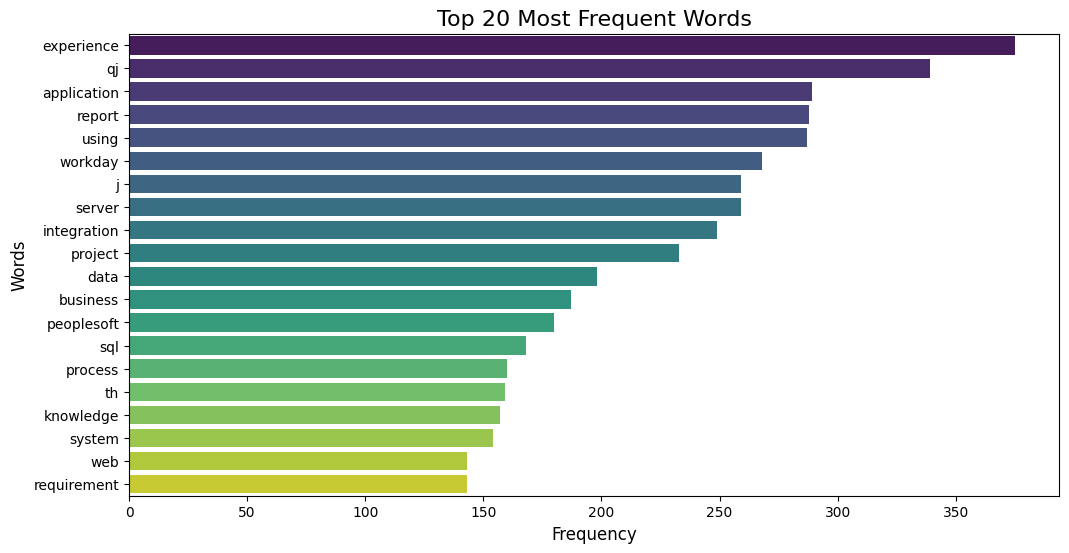

In [18]:
# Most Frequent words
# Word frequency is the actual number of times a word appears in a dataset.

from collections import Counter

# Count all words in the cleaned text
word_list = all_text.split()
word_freq = Counter(word_list)

# Convert to DataFrame for visualization
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

# Plot the most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df, palette="viridis")
plt.title("Top 20 Most Frequent Words", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.show()

<ipython-input-19-93fa790eb24e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette="coolwarm")


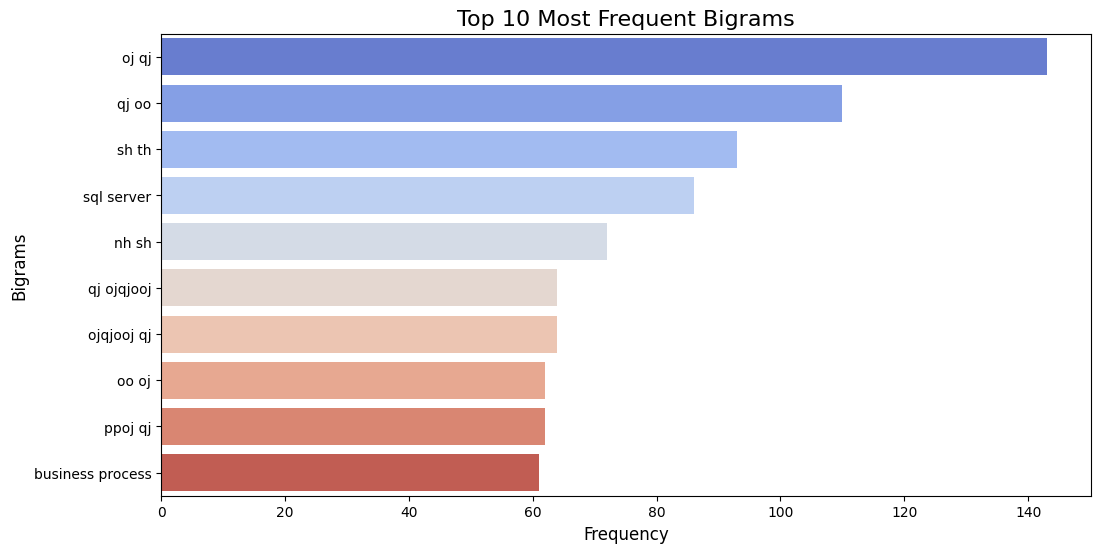

In [19]:
# Bigram analysis
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = vectorizer.fit_transform(df['Cleaned_Text'])
bigram_freq = pd.DataFrame(bigram_matrix.sum(axis=0).tolist()[0],
                           index=vectorizer.get_feature_names_out(),
                           columns=['Frequency'])

# Top 10 bigrams
top_bigrams = bigram_freq.sort_values(by='Frequency', ascending=False).head(10).reset_index()
top_bigrams.columns = ['Bigram', 'Frequency']

# Plot the bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette="coolwarm")
plt.title("Top 10 Most Frequent Bigrams", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigrams", fontsize=12)
plt.show()

<ipython-input-20-80b237780968>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette="mako")


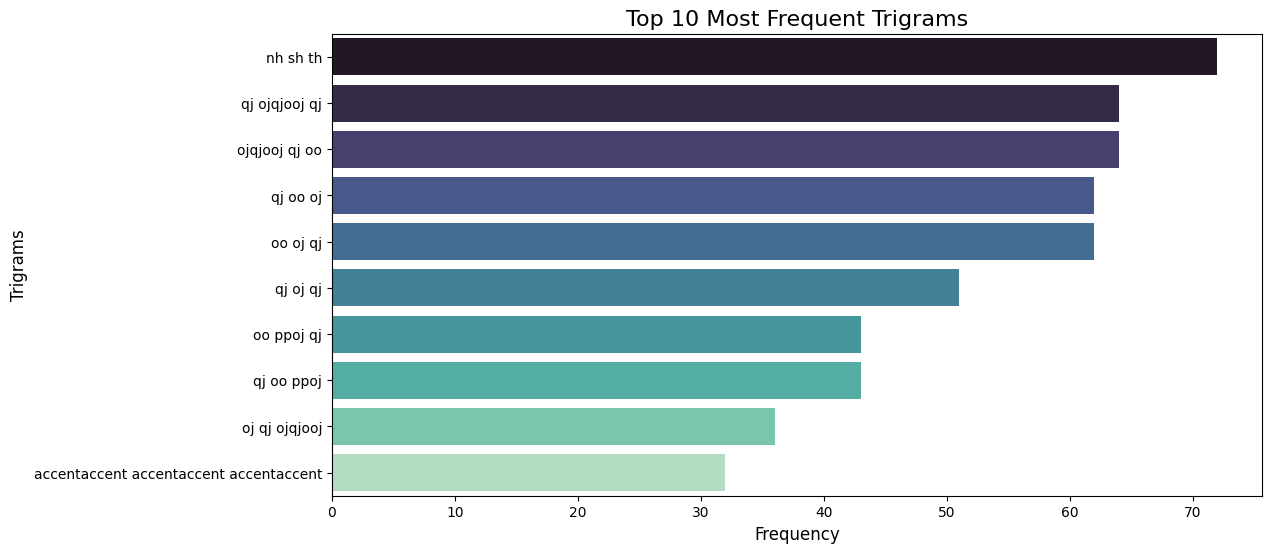

In [20]:
# Trigram Analysis
from sklearn.feature_extraction.text import CountVectorizer

# Create trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigram_matrix = trigram_vectorizer.fit_transform(df['Cleaned_Text'])

# Create a DataFrame for trigram frequencies
trigram_freq = pd.DataFrame(trigram_matrix.sum(axis=0).tolist()[0],
                            index=trigram_vectorizer.get_feature_names_out(),
                            columns=['Frequency'])

# Sort and extract the top 10 trigrams
top_trigrams = trigram_freq.sort_values(by='Frequency', ascending=False).head(10).reset_index()
top_trigrams.columns = ['Trigram', 'Frequency']

# Plot the trigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette="mako")
plt.title("Top 10 Most Frequent Trigrams", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Trigrams", fontsize=12)
plt.show()

In [21]:
# Feature Extraction
# Convert text data into numerical form using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.8)  # Limit to 5000 features
X = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Label']

In [22]:
X_df = pd.DataFrame(X, columns=tfidf.get_feature_names_out())
X_df.head()

ability  abovementioned  absence  academic  accentaccent  acceptance  \
0  0.000000             0.0      0.0       0.0      0.000000         0.0   
1  0.079358             0.0      0.0       0.0      0.000000         0.0   
2  0.000000             0.0      0.0       0.0      0.244475         0.0   
3  0.043947             0.0      0.0       0.0      0.000000         0.0   
4  0.000000             0.0      0.0       0.0      0.000000         0.0   

   access  accessibility  accommodate  according  ...  yjwic    ylinpk   yt  \
0     0.0       0.039334          0.0        0.0  ...    0.0  0.000000  0.0   
1     0.0       0.000000          0.0        0.0  ...    0.0  0.000000  0.0   
2     0.0       0.000000          0.0        0.0  ...    0.0  0.040746  0.0   
3     0.0       0.000000          0.0        0.0  ...    0.0  0.000000  0.0   
4     0.0       0.000000          0.0        0.0  ...    0.0  0.000000  0.0   

   zegnsibw      zjrj   zk  zlzslqiphhc        zp        zy   zz  
0  0.000000  0.000000  0.0     0.000000  0.000000  0.000000  0.0  
1  0.000000  0.000000  0.0     0.000000  0.000000  0.000000  0.0  
2  0.040746  0.040746  0.0     0.040746  0.038178  0.040746  0.0  
3  0.000000  0.000000  0.0     0.000000  0.000000  0.000000  0.0  
4  0.000000  0.000000  0.0     0.000000  0.000000  0.000000  0.0  

[5 rows x 1827 columns]

In [23]:
X_df.shape

(79, 1827)

In [24]:
# To display all columns, set the display option to show more columns
pd.set_option('display.max_columns', None)

# Display the DataFrame with all feature columns
print(X_df)

     ability  abovementioned  absence  academic  accentaccent  acceptance  \
0   0.000000             0.0      0.0       0.0      0.000000         0.0   
1   0.079358             0.0      0.0       0.0      0.000000         0.0   
2   0.000000             0.0      0.0       0.0      0.244475         0.0   
3   0.043947             0.0      0.0       0.0      0.000000         0.0   
4   0.000000             0.0      0.0       0.0      0.000000         0.0   
..       ...             ...      ...       ...           ...         ...   
74  0.000000             0.0      0.0       0.0      0.000000         0.0   
75  0.000000             0.0      0.0       0.0      0.000000         0.0   
76  0.031663             0.0      0.0       0.0      0.000000         0.0   
77  0.000000             0.0      0.0       0.0      0.000000         0.0   
78  0.000000             0.0      0.0       0.0      0.000000         0.0   

    access  accessibility  accommodate  according  account  accounting  \
0

In [25]:
y.value_counts()

Label
React Developer resumes            24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: count, dtype: int64

<ipython-input-26-116ad0d15aee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


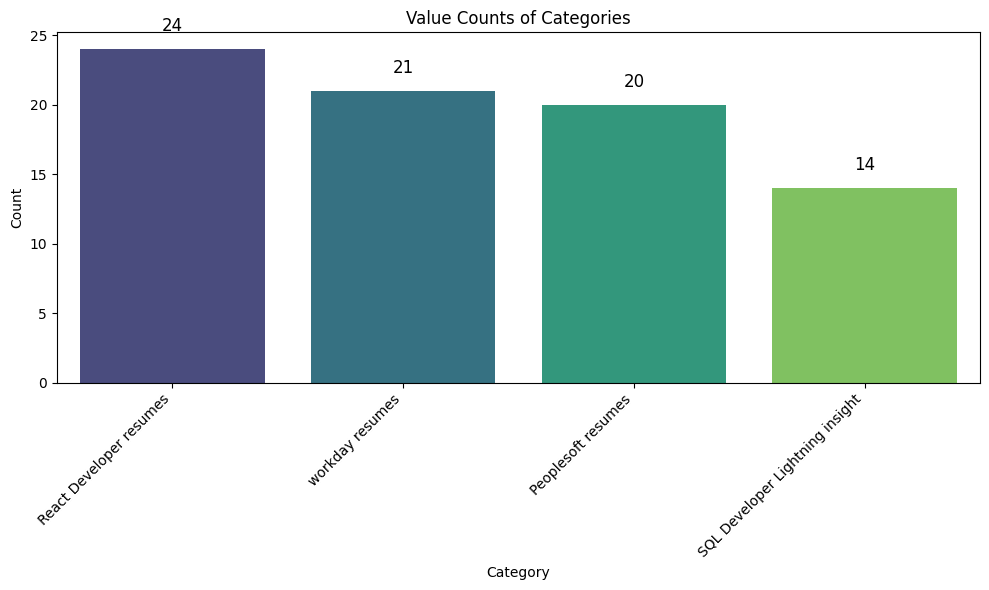

In [26]:
# Get value counts from the Series
counts = y.value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Adding count labels on top of each bar
for i, count in enumerate(counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Labels and Title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

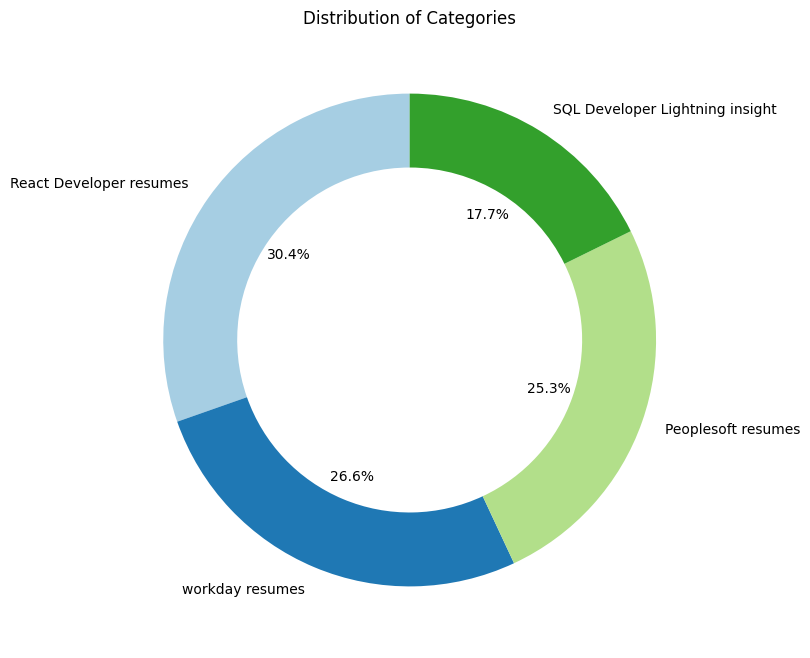

In [27]:
# Get value counts from the Series
counts = y.value_counts()

# Plot a pie chart (donut style)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})

# Title
plt.title('Distribution of Categories')

# Show plot
plt.show()

In [28]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define Models and Hyperparameter Grids
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", 0.1],
        "kernel": ["rbf", "linear"]
    },
    "LogisticRegression": {
        "C": [0.1, 1, 10],
        "penalty": ["l1", "l2"]
    },
    "NaiveBayes": {},
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }
}

In [30]:
# Hyperparameter Tuning and Model Evaluation
best_models = {}
best_scores = {}

# Loop over the models and perform hyperparameter tuning
for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name in param_grids:
        grid = GridSearchCV(
            model,
            param_grid=param_grids[model_name],
            scoring="accuracy",
            cv=5,
            verbose=1,
            n_jobs=-1
        )
        grid.fit(X_train, y_train)  # Using scaled data
        best_models[model_name] = grid.best_estimator_
        best_scores[model_name] = grid.best_score_
        print(f"Best Parameters for {model_name}: {grid.best_params_}")
    else:
        model.fit(X_train, y_train)  # Train without tuning if no grid is provided
        best_models[model_name] = model
        best_scores[model_name] = model.score(X_train, y_train)

# Evaluate the models
test_scores = {}

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores[model_name] = acc
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {acc}")
    print(classification_report(y_test, y_pred))

# Select the best model based on test accuracy
best_model_name = max(test_scores, key=test_scores.get)
best_model = best_models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {test_scores[best_model_name]}")

Training RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training GradientBoosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Training SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Training LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Best Parameters for LogisticRegression: {'C': 10, 'penalty': 'l2'}
Training NaiveBayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for NaiveBayes: {}
Training KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Model: RandomForest
Test Accuracy: 0.9375
                                 precision    recall  f1-score   support

             Peoplesoft resumes       1.00      0.50      0.67         2
        React Developer resumes       0.86      1.00      0.92         6
SQL Developer Lightning insight       1.00      1.00      1.00         3
                workday resumes       1.00      1.00      1.00         5

                       accuracy                           0.94        16
                      macro avg       0.96      0.88      0.90        16
                   weighted avg       0.95      0.94      0.93        16

Model: GradientBoosting
Test Accuracy: 0.937

In [31]:
# Select the best model based on test accuracy
best_model_name = max(test_scores, key=test_scores.get)
best_model = best_models[best_model_name]

# Output the best model and its test accuracy
print(f"\nBest Model Based on Test Accuracy: {best_model_name}")
print(f"Test Accuracy: {test_scores[best_model_name]}")


Best Model Based on Test Accuracy: KNN
Test Accuracy: 1.0


In [32]:
# Save the Model and Vectorizer
import pickle

# Save the trained model
with open('resume_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Model and Vectorizer saved successfully.")

Model and Vectorizer saved successfully.
